In [80]:
!pip install opencv-python
!pip install matplotlib
!pip install pandas

In [81]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [83]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [84]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
#     classLabels.append(fpt.read())

In [85]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [86]:
print(len(classLabels))

80


In [87]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 => 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001F7FC8B5EF0>

# Read an Image

In [88]:
img_path = 'car2.jpg'
img = cv2.imread(img_path)

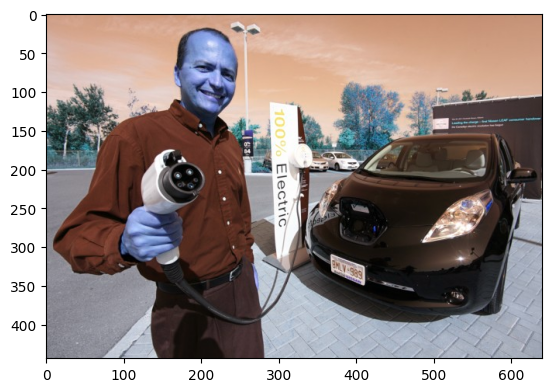

In [89]:
plt.imshow(img) #bgr

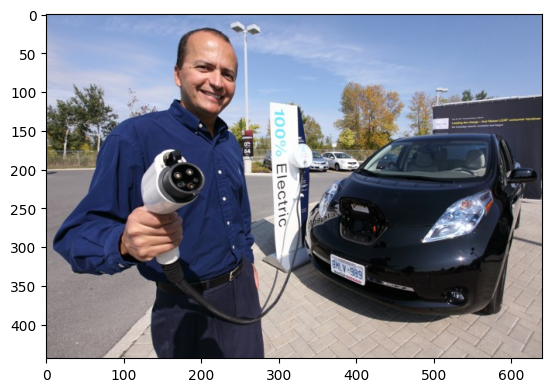

In [90]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [91]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [92]:
print(ClassIndex)

[3 1 3 3 3]


In [93]:
my_dict = {
    "Image Path": [],
    "Number of Vehicles": []
}

In [94]:
from matplotlib.transforms import Bbox
front_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
car_count = 0
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    if ClassInd == 3:
        car_count += 1
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img, classLabels[ClassInd - 1].upper(), (boxes[0] + 10, boxes[1] + 30), font, 3, (0, 255, 0), 3)
    else:
        continue

In [95]:
my_dict["Image Path"].append(img_path)
my_dict["Number of Vehicles"].append(car_count)

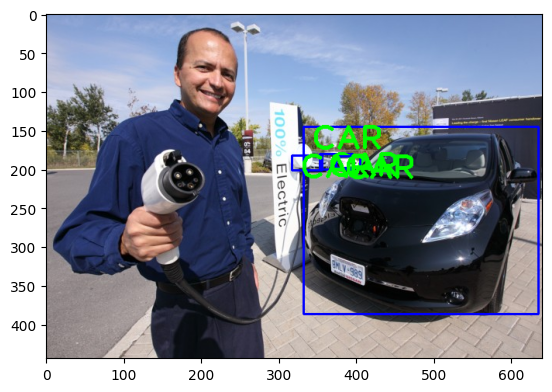

In [96]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [97]:
df = pd.DataFrame(my_dict)
df

,Image Path,Number of Vehicles
0,car2.jpg,4


In [98]:
# Save DataFrame to CSV
df.to_csv('no_car_.csv', index=False)